### Exploratory Data Analysis for the Insurance and Risk Data

In [53]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import sys
import os

In [55]:
sys.path.append(os.path.abspath('../scripts/'))

In [56]:
path = '../data/cleaned_insurance_data.csv'

In [57]:
sys.path.append(os.path.abspath('../scripts'))

In [58]:
from load_data import load_csv

In [59]:
df = load_csv(path)

c:\Users\Tegbabu\End-to-End-Insurance-Risk-Analytics-Predictive-Modeling\scripts\load_data.py:45: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
2025-06-18 10:47:51,990 - INFO - CSV file loaded successfully from ../data/cleaned_insurance_data.csv.


In [60]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999546 entries, 0 to 999545
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   UnderwrittenCoverID       999546 non-null  int64  
 1   PolicyID                  999546 non-null  int64  
 2   TransactionMonth          999546 non-null  object 
 3   IsVATRegistered           999546 non-null  bool   
 4   Citizenship               999546 non-null  object 
 5   LegalType                 999546 non-null  object 
 6   Title                     999546 non-null  object 
 7   Language                  999546 non-null  object 
 8   Bank                      999546 non-null  object 
 9   AccountType               999546 non-null  object 
 10  MaritalStatus             999546 non-null  object 
 11  Gender                    999546 non-null  object 
 12  Country                   999546 non-null  object 
 13  Province                  999546 non-null  o

#### Cleaning the dataset

In [62]:
df.isnull().sum()

UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          2
NewVehicle                  0
SumInsured

In [63]:
df.shape

(999546, 46)

In [64]:
Summerize = df[['CalculatedPremiumPerTerm', "TotalPremium", "TotalClaims"]].describe()

In [65]:
Summerize

,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,999546.000000,999546.000000,999546.000000
mean,116.161292,61.372315,64.340071
std,220.575965,157.013943,2369.564716
min,0.000000,-782.576754,-12002.412281
25%,3.225700,0.000000,0.000000
50%,8.436900,2.179737,0.000000
75%,90.000000,21.929825,0.000000
max,3051.821100,2253.507281,393092.105263


##### Inference made from the Descriptive Statistics

In [66]:
print((df["CalculatedPremiumPerTerm"] < 0).sum())
print((df["TotalPremium"] < 0).sum())
print((df["TotalClaims"] < 0).sum())

0
286
5


In summary from the above descriptive statistics shows large insurance dataset with typical right-skewed distributions for premiums and claims, but with notable data quality concerns regarding negative values in total premiums and total claims. The extreme outliers in TotalClaims are particularly prominent.

#### Visualization of the Data

###### Histogram plot for the key financial indicators which represent monetary values

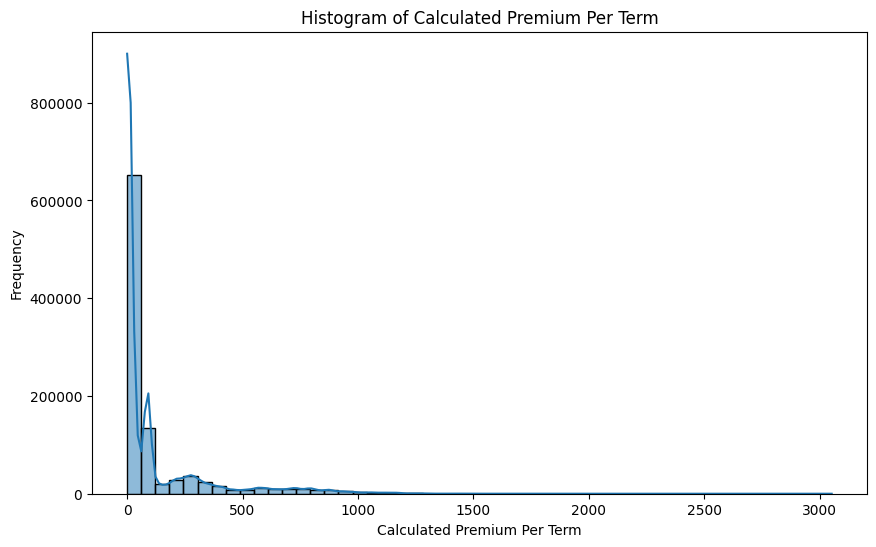

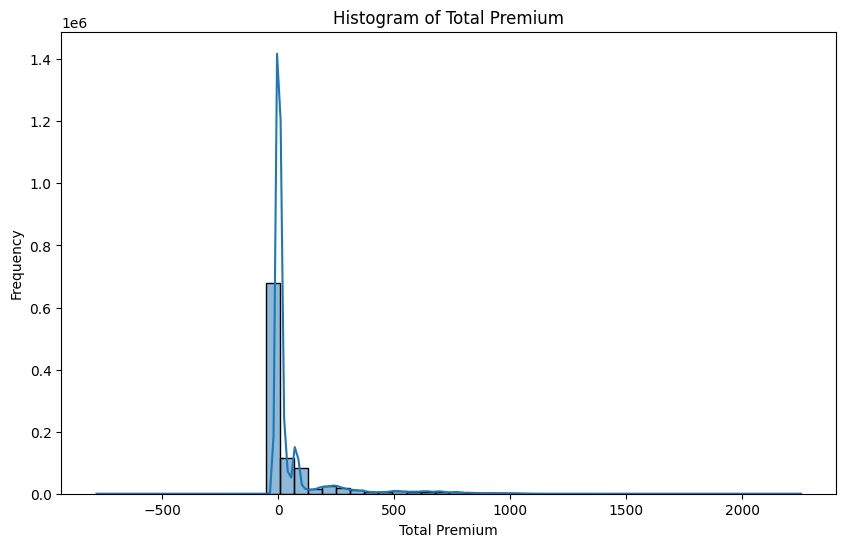

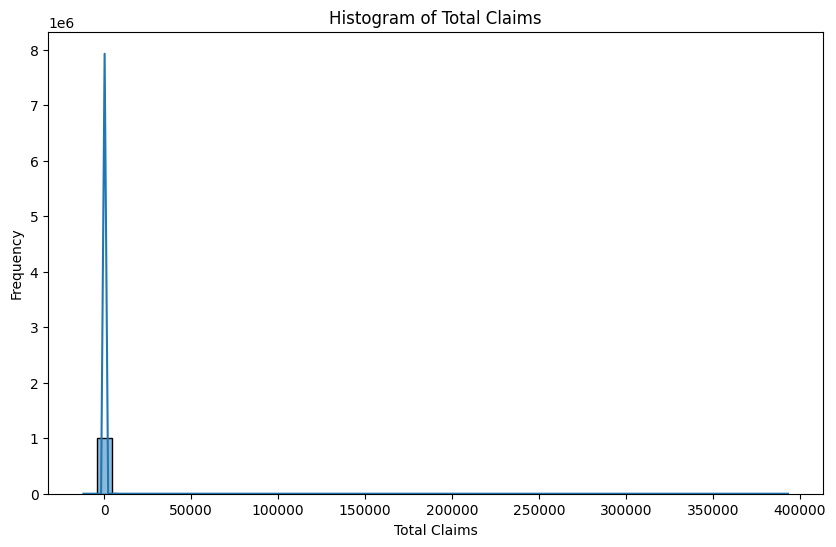

In [67]:
## Histogram of Calculated Premium Per Term
plt.figure(figsize=(10, 6))
sns.histplot(df['CalculatedPremiumPerTerm'], bins=50, kde=True)
plt.title('Histogram of Calculated Premium Per Term')
plt.xlabel('Calculated Premium Per Term')
plt.ylabel('Frequency')
plt.show()
## Histogram of Total Premium
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPremium'], bins=50, kde=True)
plt.title('Histogram of Total Premium')
plt.xlabel('Total Premium')
plt.ylabel('Frequency')
plt.show()
## Histogram of Total Claims
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalClaims'], bins=50, kde=True)
plt.title('Histogram of Total Claims')
plt.xlabel('Total Claims')
plt.ylabel('Frequency')
plt.show()

##### Barchart for the Categorical Data

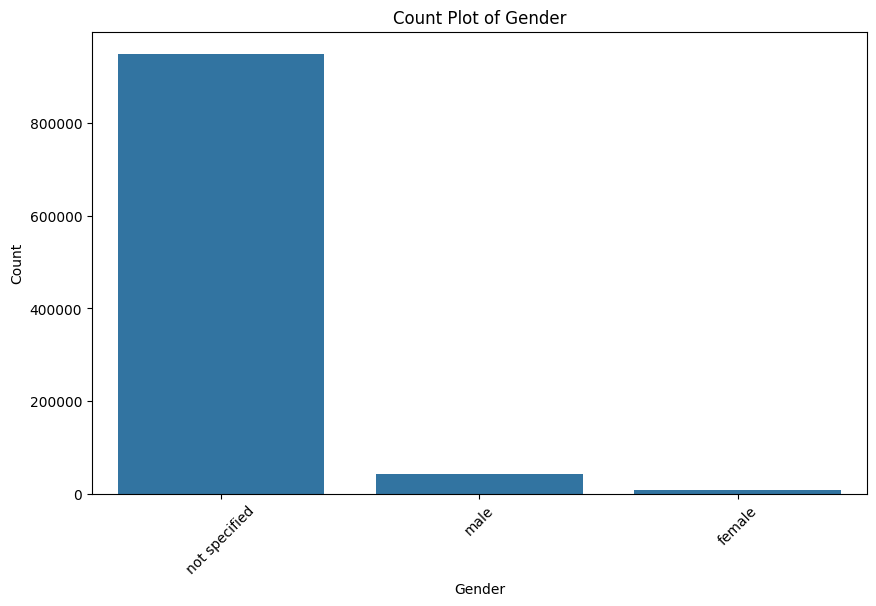

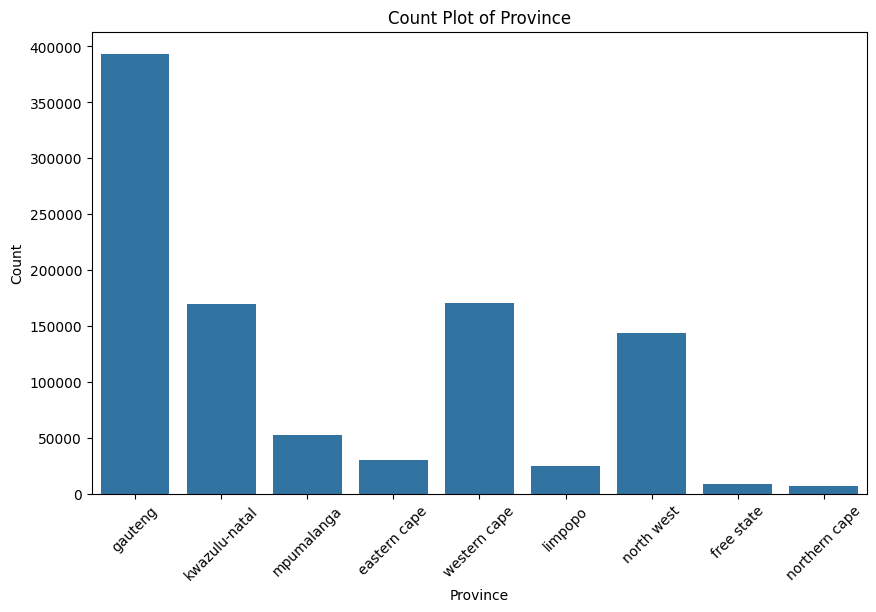

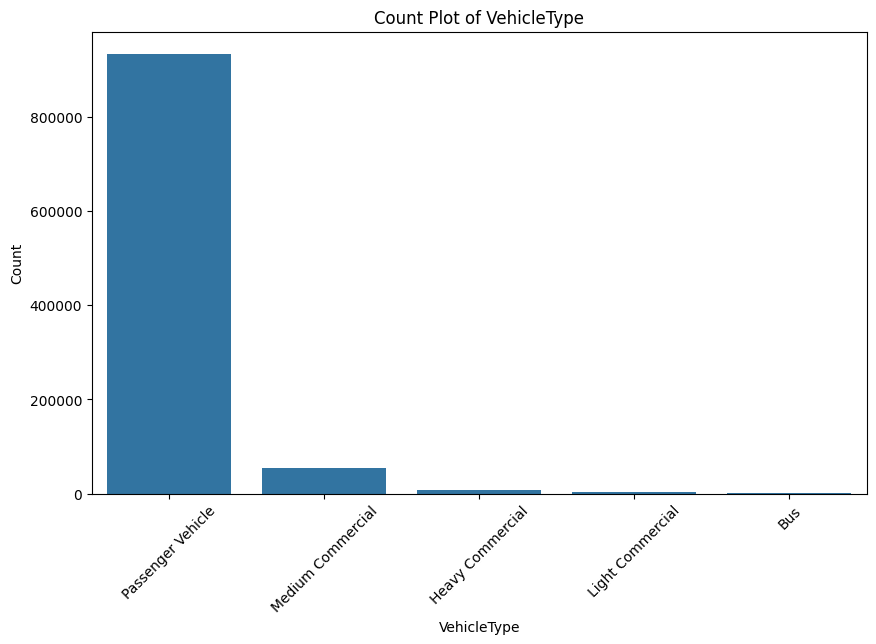

2025-06-18 10:50:26,839 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-18 10:50:31,256 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


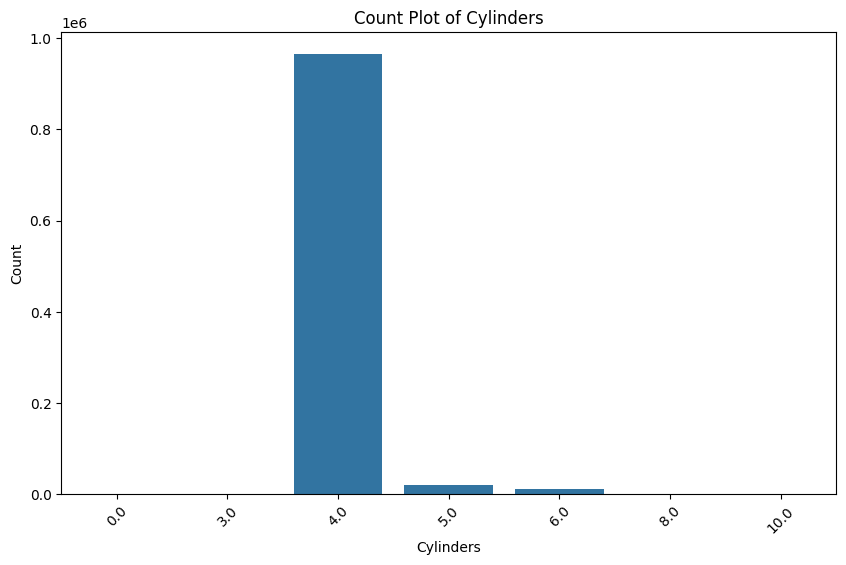

In [68]:
columns = ['Gender', 'Province', 'VehicleType', 'Cylinders']

for column in columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

##### Loss Ratio for the Portifolio and its Variability based on Province, Vehicle Type and Gender

In [69]:
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
df['LossRatio'] = df['LossRatio'].replace([np.inf, -np.inf], np.nan)

In [70]:
province_summary = df.groupby('Province').agg(
    TotalPremium=('TotalPremium', 'sum'),
    TotalClaims=('TotalClaims', 'sum')).reset_index()

In [71]:
province_summary['LossRatio'] = province_summary.apply(
    lambda row: row['TotalClaims'] / row['TotalPremium'] if row['TotalPremium'] != 0 else 0,
    axis=1
)

C:\Users\Tegbabu\AppData\Local\Temp\ipykernel_7776\50473285.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=province_summary, x='Province', y='LossRatio', palette='viridis')


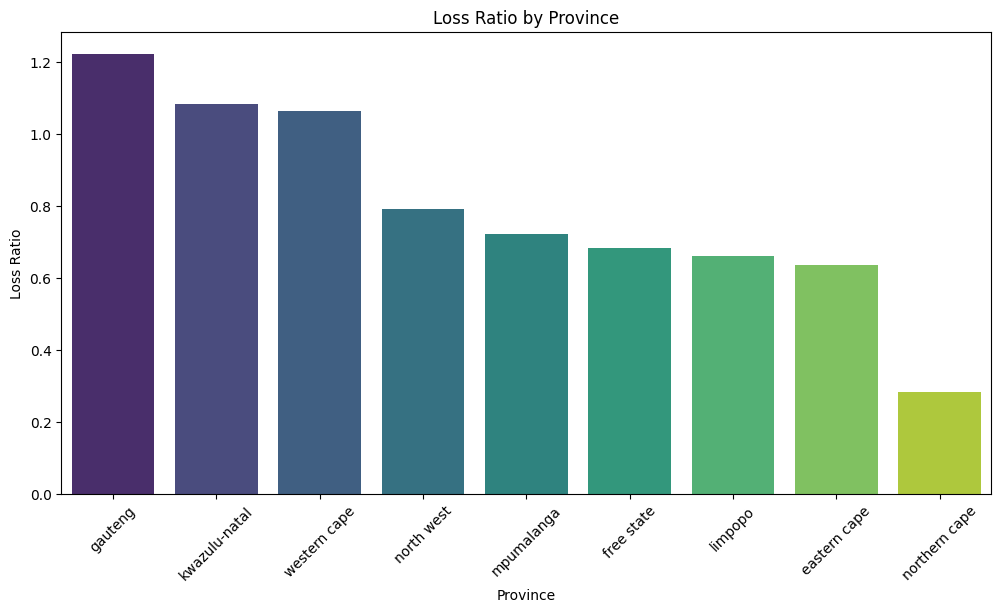

In [72]:
# Sort the data by Loss Ratio for better visualization
province_summary = province_summary.sort_values(by='LossRatio', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=province_summary, x='Province', y='LossRatio', palette='viridis')
plt.title('Loss Ratio by Province')
plt.xlabel('Province')
plt.ylabel('Loss Ratio')
plt.xticks(rotation=45)
plt.show()


In [73]:
vehicle_type_summary = df.groupby('VehicleType').agg(
    TotalPremium=('TotalPremium', 'sum'),
    TotalClaims=('TotalClaims', 'sum')).reset_index()

vehicle_type_summary['LossRatio'] = vehicle_type_summary.apply(
    lambda row: row['TotalClaims'] / row['TotalPremium'] if row['TotalPremium'] != 0 else 0,
    axis=1)

C:\Users\Tegbabu\AppData\Local\Temp\ipykernel_7776\485824021.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vehicle_type_summary, x='VehicleType', y='LossRatio', palette='viridis')


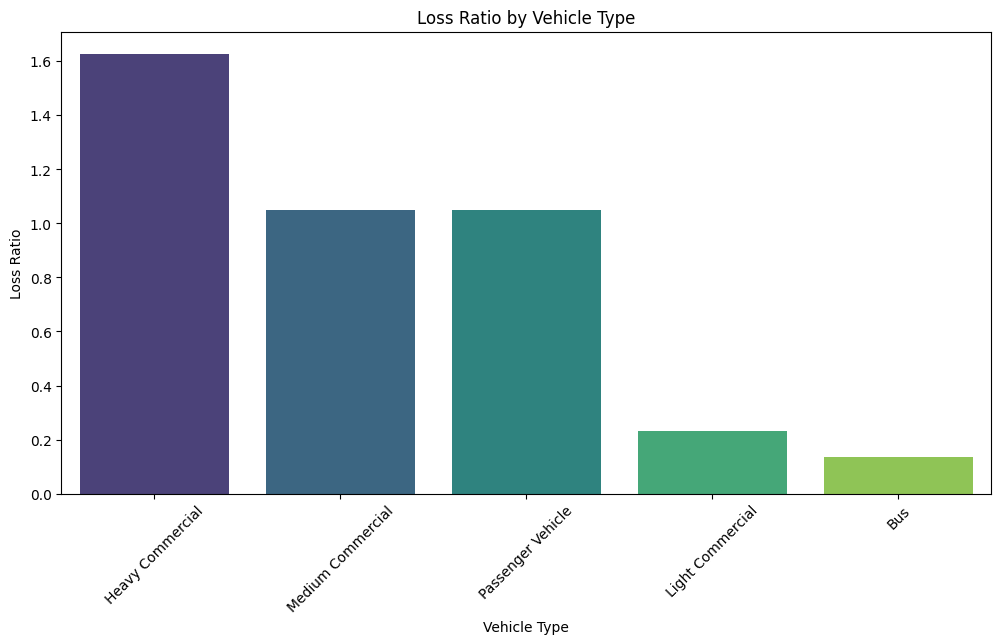

In [74]:
vehicle_type_summary = vehicle_type_summary.sort_values(by='LossRatio', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=vehicle_type_summary, x='VehicleType', y='LossRatio', palette='viridis')
plt.title('Loss Ratio by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Loss Ratio')
plt.xticks(rotation=45)
plt.show()

In [75]:
# Loss Ratio by Gender
gender_summary = df.groupby('Gender').agg(
    TotalPremium=('TotalPremium', 'sum'),
    TotalClaims=('TotalClaims', 'sum')).reset_index()

gender_summary['LossRatio'] = gender_summary.apply(
    lambda row: row['TotalClaims'] / row['TotalPremium'] if row['TotalPremium'] != 0 else 0,
    axis=1)

C:\Users\Tegbabu\AppData\Local\Temp\ipykernel_7776\919736988.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_summary, x='Gender', y='LossRatio', palette='viridis')


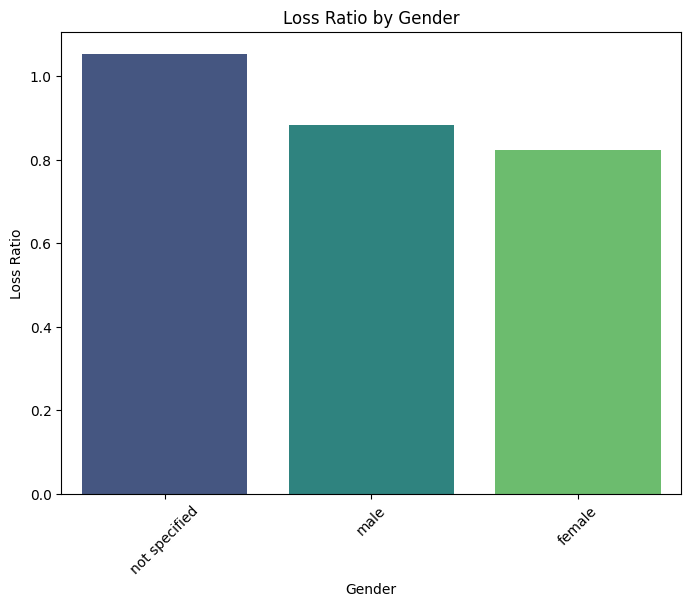

In [76]:
gender_summary = gender_summary.sort_values(by='LossRatio', ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_summary, x='Gender', y='LossRatio', palette='viridis')
plt.title('Loss Ratio by Gender')
plt.xlabel('Gender')
plt.ylabel('Loss Ratio')
plt.xticks(rotation=45)
plt.show()

##### Temporal trends Analysis

In [82]:
from monthly_trend import plot_monthly_trends

2025-06-18 11:08:09,059 - INFO - Monthly aggregation successful for {'TotalClaims': 'sum', 'TotalPremium': 'count'}.


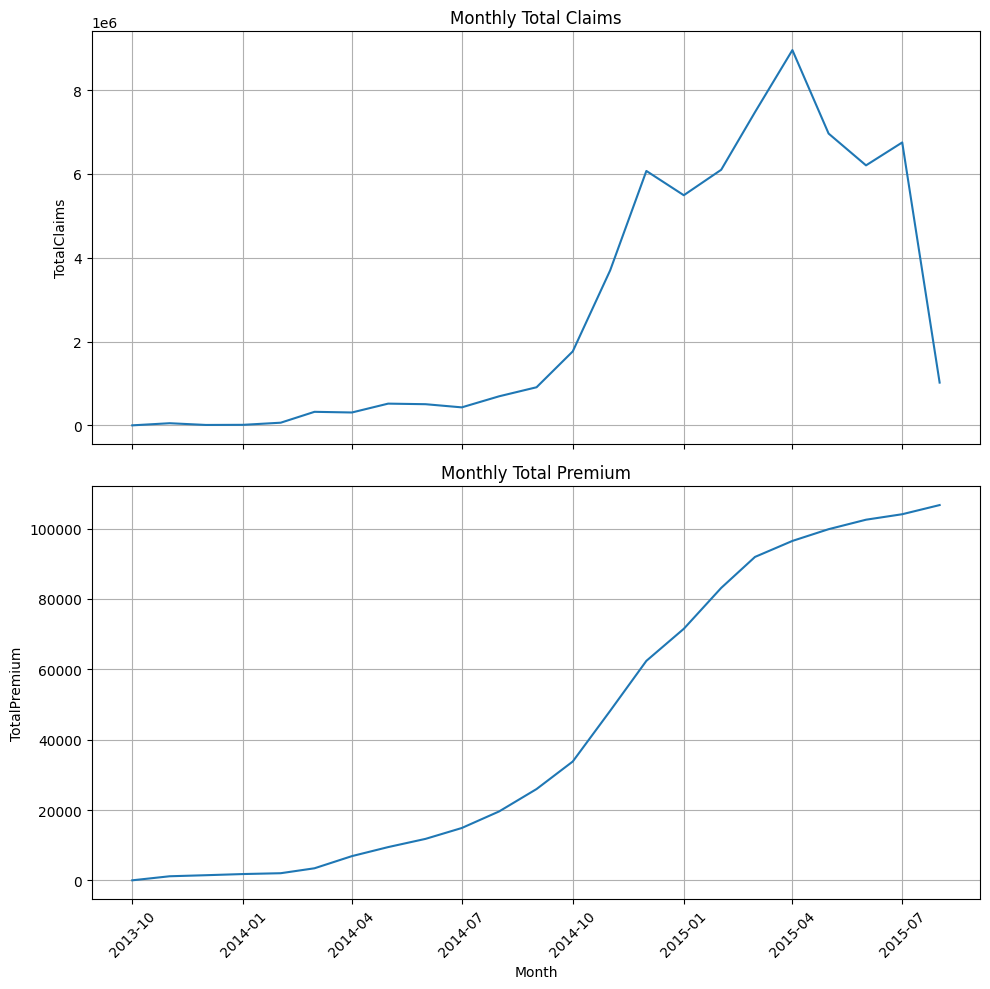

2025-06-18 11:08:15,189 - INFO - Monthly trends plotted successfully.


In [83]:
plot_monthly_trends(df, 'TransactionMonth', aggregation_column={"TotalClaims": "sum", "TotalPremium": "count"}, title_map={"TotalClaims": "Monthly Total Claims", "TotalPremium": "Monthly Total Premium"})

##### Vehicles Makes and Model Association with highest and lowest claim counts

In [87]:
model_makes_average = df.groupby(['make', 'Model'])["TotalClaims"].mean().reset_index()
model_makes_average = model_makes_average.sort_values(by='TotalClaims', ascending=False)

In [91]:
top_20_highest = model_makes_average.head(20)
top_20_lowest = model_makes_average.tail(20)

In [92]:
top_20_highest

,make,Model,TotalClaims
311,TOYOTA,L/CRUISER FJ 4.0 V6 CRUISER,5340.970273
83,HYUNDAI,H-1 2.5 CRDI WAGON A/T,4118.181043
53,FIAT,DUCATO 2.3 JTD VETRATO,1014.681021
394,VOLKSWAGEN,POLO VIVO 1.6 5Dr,827.558882
130,MERCEDES-BENZ,C180 BE COUPE,743.459027
162,MERCEDES-BENZ,SPRINTER 312D F/C P/V,664.540138
246,SUZUKI,ERTIGA 1.4 GA,631.774519
337,TOYOTA,YARIS T1 3Dr,618.719846
4,AUDI,A4 1.8T S AVANT MULTITRONIC,480.282859
387,VOLKSWAGEN,POLO 1.6 COMFORTLINE,431.842105


In [93]:
top_20_lowest

,make,Model,TotalClaims
155,MERCEDES-BENZ,E 240,0.000000
156,MERCEDES-BENZ,ML 320 CDI A/T,0.000000
176,MERCEDES-BENZ,SPRINTER 413 CDI P/V C/C,0.000000
175,MERCEDES-BENZ,SPRINTER 413 CDI HI-ROOF F/C P/V,0.000000
174,MERCEDES-BENZ,SPRINTER 413 CDI F/C P/V,0.000000
173,MERCEDES-BENZ,SPRINTER 412D P/V C/C,0.000000
172,MERCEDES-BENZ,SPRINTER 412D HIGH ROOF P/V P/V,0.000000
171,MERCEDES-BENZ,SPRINTER 319 CDi F/C P/V,0.000000
170,MERCEDES-BENZ,SPRINTER 319 CDi F/C C/C,0.000000
169,MERCEDES-BENZ,SPRINTER 315 CDI HI ROOF F/C P/V,0.000000


In [103]:
df.drop(columns=['combined_make_model'], inplace=True, errors='ignore')

In [104]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,LossRatio
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,NaN
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,NaN


C:\Users\Tegbabu\AppData\Local\Temp\ipykernel_7776\1701313872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_highest["combined_make_model"] = top_20_highest[list(['make', 'Model'])].agg(' '.join, axis=1)
C:\Users\Tegbabu\AppData\Local\Temp\ipykernel_7776\1701313872.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Vehicle Make', bbox_to_anchor=(1.05, 1), loc='upper left')


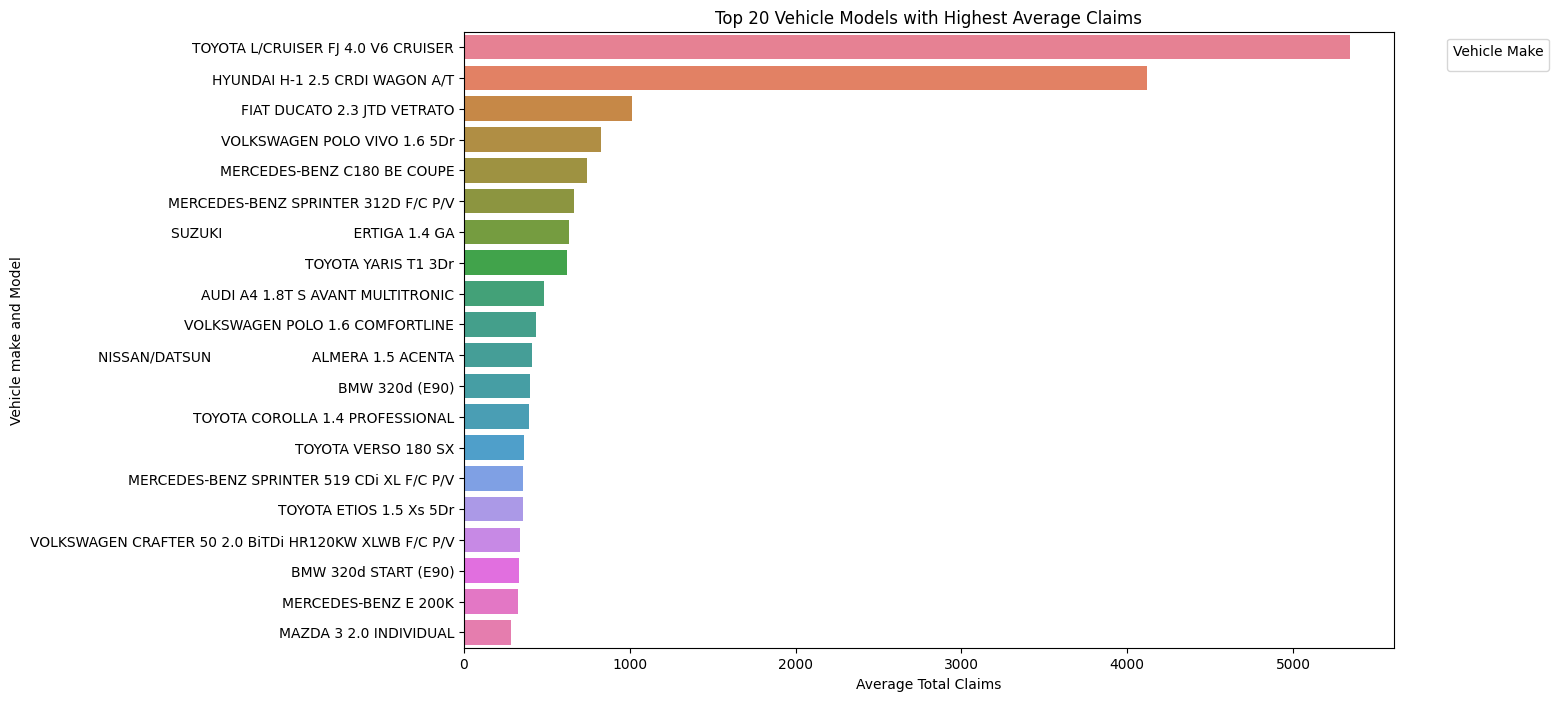

In [105]:
##Horizontal Barchart
top_20_highest["combined_make_model"] = top_20_highest[list(['make', 'Model'])].agg(' '.join, axis=1)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_20_highest, y="combined_make_model", x='TotalClaims', hue='combined_make_model', orient="h", dodge=False)
plt.title('Top 20 Vehicle Models with Highest Average Claims')
plt.xlabel('Average Total Claims')
plt.ylabel('Vehicle make and Model')
plt.legend(title='Vehicle Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


C:\Users\Tegbabu\AppData\Local\Temp\ipykernel_7776\1188708845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_lowest["combined_make_model"] = top_20_lowest[list(['make', 'Model'])].agg(' '.join, axis=1)
C:\Users\Tegbabu\AppData\Local\Temp\ipykernel_7776\1188708845.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Vehicle Make', bbox_to_anchor=(1.05, 1), loc='upper left')


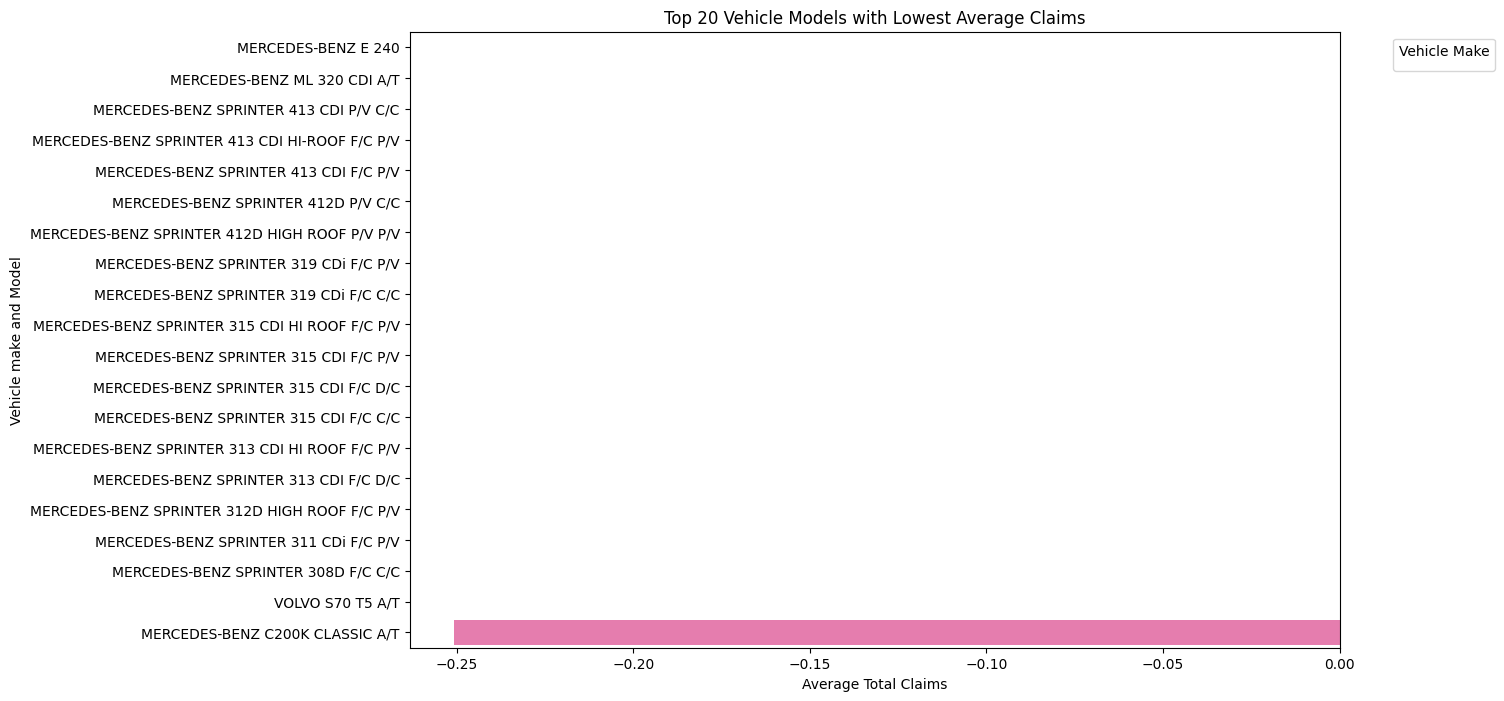

In [106]:
##Horizontal Barchart
top_20_lowest["combined_make_model"] = top_20_lowest[list(['make', 'Model'])].agg(' '.join, axis=1)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_20_lowest, y="combined_make_model", x='TotalClaims', hue='combined_make_model', orient="h", dodge=False)
plt.title('Top 20 Vehicle Models with Lowest Average Claims')
plt.xlabel('Average Total Claims')
plt.ylabel('Vehicle make and Model')
plt.legend(title='Vehicle Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()